# Predictions based on fifth vector - v5

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)
* Forma (zwycięstwa/przegrane) z ostatnich 3 meczów
* Forma (zwycięstwa/przegrane) z ostatnich 5 meczów 
* Ważona średnia liczba oddanych strzałów z ostatnich 3 meczów
* Ważona średnia liczba oddanych strzałów z ostatnich 5 meczów
* Ważona średnia liczba strzałów na bramkę z ostatnich 3 meczów
* Ważona średnia liczba strzałów na bramkę z ostatnich 5 meczów
* Ważona średnia liczba goli w ostatnich 3 meczach
* Ważona średnia liczba goli w ostatnich 5 meczach

In [2]:
model_data = pd.read_csv('learning_vectors/v05/version5-complete.csv', sep=',')

# model_data = model_data.set_index(['Match_id'])
# model_data = model_data.sort_values(['League_id', 'Date'])
# model_data.columns = [
#     'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
#     'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
#     'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
#     'H_age', 'A_age',
#     'H_TMV', 'A_TMV',
#     'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
#     'H_Form03', 'A_Form03',
#     'H_Form05', 'A_Form05',
#     'H_MeanShots03', 'A_MeanShots03',
#     'H_MeanShots05', 'A_MeanShots05',
#     'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
#     'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05',
#     'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03',
#     'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05',
#     'H_WeightedMeanShots03', 'A_WeightedMeanShots03',
#     'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
#     'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
#     'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
#     'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
#     'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
# ]

print(model_data.shape)
# model_data.head()


(6080, 62)


## Different algorithms comparison

In [3]:
features = [
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_WeightedMeanShots03', 'A_WeightedMeanShots03',
    'H_WeightedMeanShots05', 'A_WeightedMeanShots05',
    'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03',
    'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05',
    'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03',
    'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
scoring_type = 'accuracy'

f = open('results_v5.txt','w')

print(model_data[features].shape)
model_data[features].head()


(6080, 20)


,H_age,A_age,H_TMV,A_TMV,H_Form03,A_Form03,H_Form05,A_Form05,H_WeightedMeanShots03,A_WeightedMeanShots03,H_WeightedMeanShots05,A_WeightedMeanShots05,H_WeightedMeanShotsOnTarget03,A_WeightedMeanShotsOnTarget03,H_WeightedMeanShotsOnTarget05,A_WeightedMeanShotsOnTarget05,H_WeightedMeanFullTimeGoals03,A_WeightedMeanFullTimeGoals03,H_WeightedMeanFullTimeGoals05,A_WeightedMeanFullTimeGoals05
0,21.3,24.6,250.0,64.0,4,1,7,1,27.578947,15.578947,19.617647,11.823529,15.578947,7.368421,11.558824,5.058824,2.842105,1.315789,2.000000,0.735294
1,24.9,23.9,91.0,257.0,0,6,3,12,7.842105,23.210526,8.000000,17.882353,3.473684,11.473684,4.235294,9.529412,0.000000,1.421053,0.558824,1.764706
2,24.3,25.7,80.0,61.0,4,3,5,5,15.263158,19.000000,13.558824,17.264706,8.052632,9.052632,8.058824,9.176471,1.473684,1.368421,1.029412,1.117647
3,24.4,26.4,162.0,86.0,6,4,10,4,14.263158,16.894737,13.088235,13.911765,7.631579,10.263158,6.941176,7.764706,1.947368,3.368421,1.882353,2.058824
4,22.3,22.5,73.0,212.0,7,4,11,7,14.368421,11.842105,13.058824,10.735294,9.631579,7.157895,7.558824,6.382353,2.421053,3.263158,1.941176,2.411765


In [4]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s  \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



### Basic compraison: 

--- Basic comparison of algorithms  ---
Algo: 	res.mean: 	res.std:
LR  	0.532401 	(0.009949)
LDA  	0.533059 	(0.014394)
KNN  	0.481743 	(0.016171)
CART  	0.429112 	(0.004753)
NB  	0.482072 	(0.010003)
SVM  	0.476151 	(0.017606)


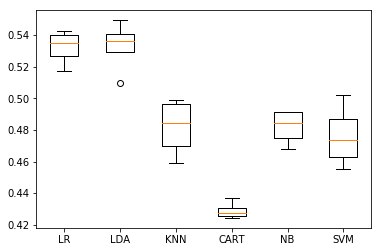

In [5]:
X = model_data[features]
y = model_data['Result']

title = "--- Basic comparison of algorithms  ---"

compare_algs(X, y, cross_validator, scoring_type, title)


### Basic comparison with preprocessing:

--- Basic comparison with preprocessing  ---
Algo: 	res.mean: 	res.std:
LR  	0.534046 	(0.008391)
LDA  	0.533717 	(0.005551)
KNN  	0.475329 	(0.005857)
CART  	0.418092 	(0.005857)
NB  	0.482072 	(0.009109)
SVM  	0.534868 	(0.013443)


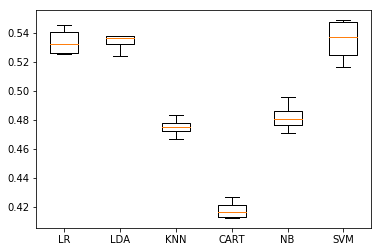

In [6]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

title = "--- Basic comparison with preprocessing  ---"

compare_algs(X, y, cross_validator, scoring_type, title)